In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import plotly.express as px


In [3]:
df = pd.read_csv('Salary.csv')

In [4]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior
0,32.0,Male,1,Software Engineer,5.0,90000.0,UK,White,0
1,28.0,Female,2,Data Analyst,3.0,65000.0,USA,Hispanic,0
2,45.0,Male,3,Manager,15.0,150000.0,Canada,White,1
3,36.0,Female,1,Sales Associate,7.0,60000.0,USA,Hispanic,0
4,52.0,Male,2,Director,20.0,200000.0,USA,Asian,0


In [5]:
df['Job Title'].nunique()

129

<h2>UK Senior Software Engineer average salary calculations</h2>

In [6]:

UkMalefilt = (df['Country'] == 'UK') & (df['Gender'] == 'Male') & (df['Job Title'] == 'Software Engineer') & (df['Senior'] == 1)
UkFemalefilt = (df['Country'] == 'UK') & (df['Gender'] == 'Female') & (df['Job Title'] == 'Software Engineer') & (df['Senior'] == 1)
jobTitle = 'senior software engineer'

In [7]:
df[UkMalefilt].head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior
1246,37.0,Male,2,Software Engineer,8.0,150000.0,UK,Mixed,1
1271,47.0,Male,3,Software Engineer,15.0,180000.0,UK,White,1
1304,37.0,Male,2,Software Engineer,9.0,150000.0,UK,White,1
1305,31.0,Male,2,Software Engineer,7.0,140000.0,UK,Mixed,1
1332,36.0,Male,2,Software Engineer,7.0,140000.0,UK,White,1


In [8]:
df[UkFemalefilt].head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior
1215,37.0,Female,2,Software Engineer,9.0,155000.0,UK,Asian,1
1610,40.0,Female,3,Software Engineer,12.0,160000.0,UK,White,1
1658,39.0,Female,2,Software Engineer,11.0,160000.0,UK,Welsh,1
2432,42.0,Female,2,Software Engineer,16.0,138286.0,UK,Asian,1
2507,42.0,Female,2,Software Engineer,16.0,138286.0,UK,Welsh,1


In [9]:
AvgSenSalMale = df.loc[UkMalefilt, 'Salary'].mean()

In [10]:
AvgSenSalFemale = df.loc[UkFemalefilt, 'Salary'].mean()

In [11]:
# Average difference between male and female salary
SalGenDiff = (AvgSenSalMale - AvgSenSalFemale)
print(f'The average male {jobTitle} salary in the UK = ${AvgSenSalMale}')
print(f'The average female {jobTitle} salary in the UK = ${AvgSenSalFemale}')
print(f'On average, male {jobTitle}s earn ${SalGenDiff} more than female {jobTitle}s in the UK ')

The average male senior software engineer salary in the UK = $166034.5
The average female senior software engineer salary in the UK = $126498.0
On average, male senior software engineers earn $39536.5 more than female senior software engineers in the UK 


In [12]:
male_df = pd.DataFrame()
female_df = pd.DataFrame()

In [13]:
male_rows = df[df['Gender'] == 'Male'][['Age','Gender','Education Level','Job Title','Years of Experience', 'Salary', 'Race', 'Senior']]
male_df = male_df.append(male_rows, ignore_index=False)
female_rows = df[df['Gender'] == 'Female'][['Age','Gender','Education Level','Job Title','Years of Experience', 'Salary', 'Race', 'Senior']]
female_df = female_df.append(female_rows, ignore_index=False)

C:\Users\Harv\AppData\Local\Temp\ipykernel_4872\903038918.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  male_df = male_df.append(male_rows, ignore_index=False)
C:\Users\Harv\AppData\Local\Temp\ipykernel_4872\903038918.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_df = female_df.append(female_rows, ignore_index=False)


In [14]:
male_df.describe()

,Age,Education Level,Years of Experience,Salary,Senior
count,3671.000000,3671.000000,3671.000000,3671.000000,3671.000000
mean,34.418415,1.640425,8.617407,121395.697630,0.155816
std,7.979936,0.898282,6.125502,52098.626225,0.362730
min,22.000000,0.000000,0.000000,350.000000,0.000000
25%,28.000000,1.000000,3.000000,75000.000000,0.000000
50%,32.000000,1.000000,8.000000,120000.000000,0.000000
75%,40.000000,2.000000,13.000000,170000.000000,0.000000
max,62.000000,3.000000,32.000000,250000.000000,1.000000


In [15]:
female_df.describe()

,Age,Education Level,Years of Experience,Salary,Senior
count,3013.000000,3013.000000,3013.000000,3013.000000,3013.000000
mean,32.626286,1.600398,7.420179,107888.998672,0.128443
std,6.976178,0.857914,5.844006,52723.610035,0.334638
min,21.000000,0.000000,0.000000,500.000000,0.000000
25%,28.000000,1.000000,3.000000,60000.000000,0.000000
50%,31.000000,2.000000,6.000000,105000.000000,0.000000
75%,36.000000,2.000000,11.000000,150000.000000,0.000000
max,60.000000,3.000000,34.000000,220000.000000,1.000000


In [16]:
averageSalByJob = df.groupby('Job Title')['Salary'].mean()

<h5>The following code asks for a job title from a list of common titles. Then plots a graph of salary vs years of experience for that job title.</h5>
<p> I commented it out because it was making my vscode hang, however when in a .py file this code ran with no issues.</p>

In [ ]:
# while True:
#     commonJobs = df['Job Title'].value_counts()[df['Job Title'].value_counts() > 100].index.tolist()

#     print("Job Titles with more than 90 instances: ", commonJobs)

#     inputJob = input("\nEnter a job title from the above list (or 'exit' to quit): ")
#     filtered_df = pd.DataFrame()
    
#     if inputJob.lower() == 'exit':
#         break
#     elif inputJob in commonJobs:
#         filtered_df = df[df['Job Title'] == inputJob]

#     if not filtered_df.empty:
#         maxSalary = filtered_df['Salary'].max()
#         minSalary = filtered_df['Salary'].min()
#         meanSalary = filtered_df['Salary'].mean()   
#         print(f"\nMaximum salary for {inputJob}: ${maxSalary} \nMinimum salary for {inputJob}: ${minSalary} \nAverage salary for {inputJob}: ${meanSalary}")
        
#         sns.scatterplot(x='Years of Experience', y='Salary', data=filtered_df)
#         plt.xlim(0, np.max(df['Years of Experience']))
#         plt.title(f'Salary vs. Years of Experience for {inputJob}')
#         plt.xlabel('Years of Experience')
#         plt.ylabel('Salary')
#         plt.show()
#     else:
#         print(f"\nNo data available for the job title: {inputJob} \n")

In [17]:
average_salary_by_race = male_df.groupby('Race')['Salary'].mean().reset_index()

# Create Radar Chart using Plotly Express
fig = px.line_polar(average_salary_by_race, r='Salary', theta='Race', line_close=True,
                    title='Radar Chart of Average Male Salary by Race', template='plotly_dark')

# Show the chart
fig.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


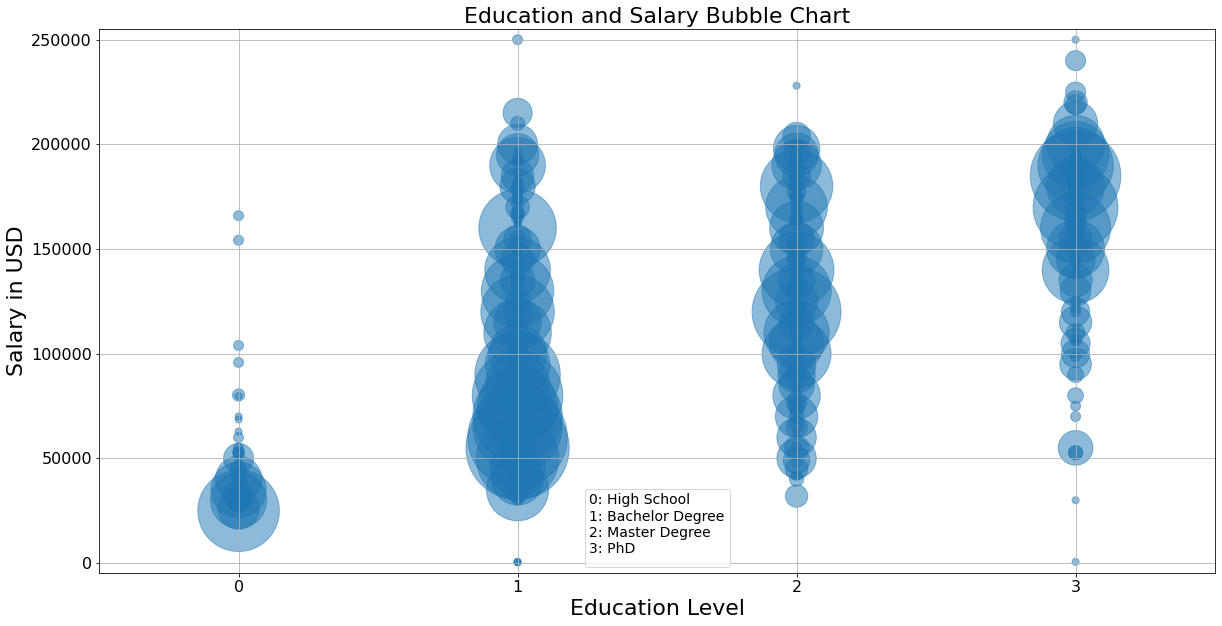

In [18]:
grouped_df = df.groupby(['Education Level', 'Salary']).size().reset_index(name='Frequency')

# Scatter plot with bubble size based on frequency
plt.figure(figsize=(20, 10))
plt.scatter(grouped_df['Education Level'], grouped_df['Salary'], s=grouped_df['Frequency'] * 50, alpha=0.5)

# Customize the plot
plt.title('Education and Salary Bubble Chart', fontsize=22)
plt.xlabel('Education Level', fontsize=22)
plt.ylabel('Salary in USD', fontsize=22)
plt.grid(True)
plt.xticks(grouped_df['Education Level'].unique(), fontsize=16)
plt.yticks(fontsize=16)
plt.xlim(-0.5, len(grouped_df['Education Level'].unique()) - 0.5)
plt.ylim(df['Salary'].min() - 5000, df['Salary'].max() + 5000)
plt.legend(title='0: High School\n1: Bachelor Degree\n2: Master Degree\n3: PhD ', title_fontsize='14', fontsize='12',loc='lower center')
plt.show()

C:\Users\Harv\AppData\Local\Temp\ipykernel_4872\472719389.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




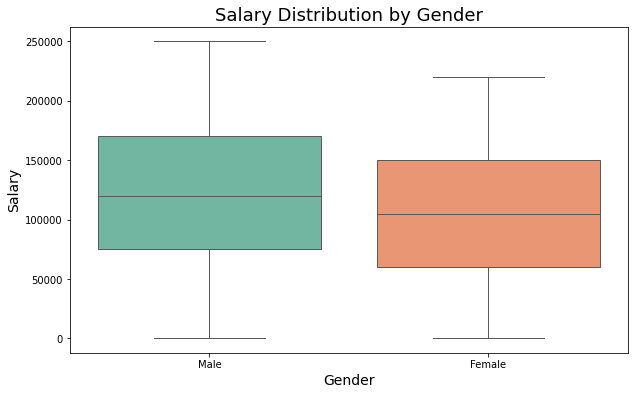

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Salary', data=df, palette='Set2')

# Customize the plot
plt.title('Salary Distribution by Gender', fontsize=18)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Salary', fontsize=14)

plt.show()

<h5>The following code asks for the user to input a job title from a list of the top 20 most common job titles and for that job title prints a chart to the average salary for male and female in each of the countries in the dataset.</h5>

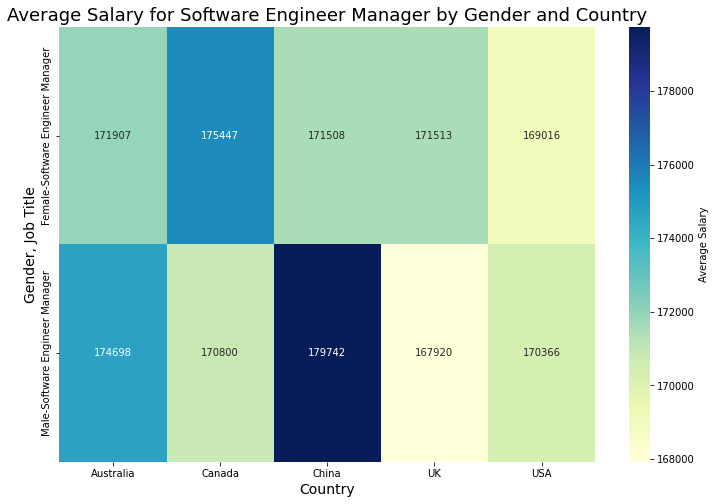

In [20]:
top_job_titles = df['Job Title'].value_counts().nlargest(20).index.tolist()
# print(top_job_titles)
# User input for job title (choose from the top 20 most common)
user_input_job_title = input(f"Enter a job title from the top 20 most common: {', '.join(top_job_titles)}\n")

# Filter DataFrame based on user input job title
selected_df = df[df['Job Title'] == user_input_job_title]

# Pivot the DataFrame to get average salary for each combination
pivot_df = selected_df.pivot_table(values='Salary', index=['Gender', 'Job Title'], columns='Country', aggfunc='mean')

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_df, annot=True, cmap='YlGnBu', fmt='.0f', cbar_kws={'label': 'Average Salary'})

# Customize the plot
plt.title(f'Average Salary for {user_input_job_title} by Gender and Country', fontsize=18)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Gender, Job Title', fontsize=14)

plt.show()